<a href="https://colab.research.google.com/github/MarcoATL/MachineLearning/blob/main/Web_scrapping_KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Web Scrapping (Comedores Dico)

In [ ]:
import requests
from bs4 import BeautifulSoup
import csv
import numpy

URL = "https://dico.com.mx/df/comedor.html"

page = requests.get(URL, headers= {'User-Agent': 'Mozilla/5.0'})#obtiene el contenido de una pagina web
#'User-Agent' permite a los servidores identificar nuestro programa
soup = BeautifulSoup(page.content, "html.parser")#crea la sopa: arbol de obbjetos que representan
                                                  #el parses analiza una cadena de símbolos y transfoma

results = soup.find_all(class_="product details product-item-details")#busqueda de elementos deseados
sillas = soup.find_all(class_="incluye")
precio = soup.find_all(class_="price")


f= open('precios_dico.html',"w")
f.write(str(soup))
f.close()

#####################################################################
with open('precios_dico.csv','w') as csvfile:
  fieldnames = ['metros cuadrados','ID','Precios']
  writer = csv.DictWriter(csvfile,fieldnames=fieldnames)
  writer.writeheader()
#####################################################################

a=0

for resul in sillas:
  x=resul.getText().split()
  a+=1
  if (len(x)>=11):
    dimensionX=x[3]
    dimensionY=x[5]
    if ((dimensionX.isdigit()==True) and (dimensionY.isdigit()==True)):
      dimension=(int(dimensionX)*int(dimensionY))/10000
      #print(dimension)
      with open('precios_dico.csv','a') as csvfile:
        fieldnames=['metros cuadrados','ID']
        writer=csv.DictWriter(csvfile,fieldnames=fieldnames)
        writer.writerow({'metros cuadrados':dimension,'ID':a})

Id=[]
with open('precios_dico.csv',"r") as File:
    csv_reader = csv.reader(File)
    list_of_rows = list(csv_reader)
    #print(list_of_rows)
    
    for i in list_of_rows:
        Id.append(i[1])
    Id.pop(0)
    Id = list(map(int,Id))
    print(Id)

Lista_Precios=[]
Precios_finales=[]
for cash in precio:
  X = cash.getText().split()
  Precios = X[0].replace(",","")
  Precios = Precios.replace("$","")
  Precios = Precios.replace(".00","")
  Lista_Precios.append(int(Precios))
  #print(Precios)


for j in range(len(Id)):
  numero = Id[j]
  Precios_finales.append(int(Lista_Precios[j]))
  with open('precios_dico.csv','a') as csvfile:
        fieldnames=['Precios']
        writer=csv.DictWriter(csvfile,fieldnames=fieldnames)
        writer.writerow({'Precios':Precios_finales[j]})


80
80
[9, 10, 11, 12, 13, 14, 17, 18, 19, 20, 27, 28, 29, 30, 31, 32, 35, 36, 37, 38, 41, 42, 47, 48, 49, 50, 57, 58, 59, 60, 67, 68, 69, 70, 73, 74, 75, 76, 79, 80]
40
40


#Algoritmo de agrupación K-Means

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Carga del conjunto de datos
dataset = pd.read_csv('precios_comedores.csv')
X = dataset.iloc[:, [0, 2]].values

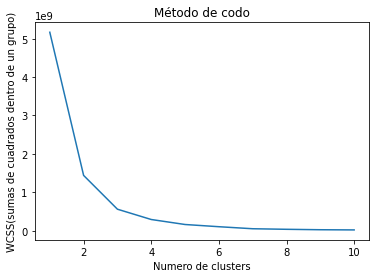

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Grafica de la suma de las distancias
plt.plot(range(1, 11), wcss)
plt.title('Método de codo')
plt.xlabel('Numero de clusters')
plt.ylabel('WCSS(sumas de cuadrados dentro de un grupo)')
plt.show()

In [ ]:
# Creando el k-Means para los 3 grupos encontrados
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

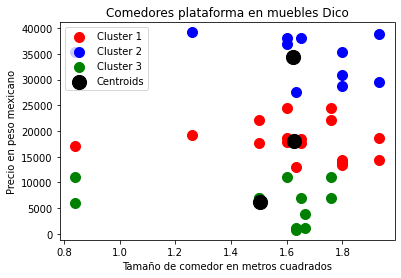

In [ ]:
# Visualizacion grafica de los clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')


plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'black', label = 'Centroids')

plt.title('Comedores en muebles Dico')
plt.xlabel('Tamaño de comedor en metros cuadrados')
plt.ylabel('Precio en peso mexicano')
plt.legend()
plt.show()